(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                        

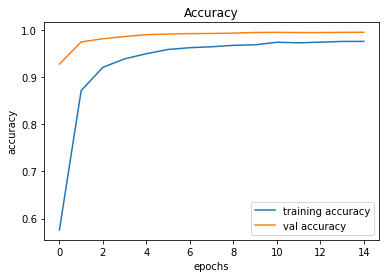

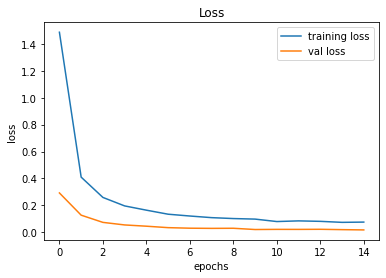

395/395 [==============================] - 2s 5ms/step
Confusion Matrix:
[[ 60   0   0 ...   0   0   0]
 [  0 710   1 ...   0   0   0]
 [  0   5 742 ...   0   0   0]
 ...
 [  0   0   0 ...  86   0   0]
 [  0   0   0 ...   0  45   0]
 [  0   0   0 ...   0   0  88]]
Accuracy: 0.965241
Precision: 0.952761
Recall: 0.942454
F1 score: 0.943769


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)
print(data.shape, labels.shape)

# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.h5')

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model
path = os.path.join(cur_path,data_folder)
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)

# Predicting on test set
pred = np.argmax(model.predict(X_test),axis=1)

# Performance evaluation
cm = confusion_matrix(labels, pred)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred, average='macro')
print('F1 score: %f' % f1)



(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                      

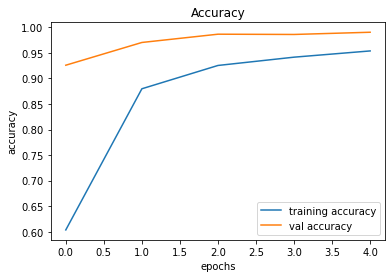

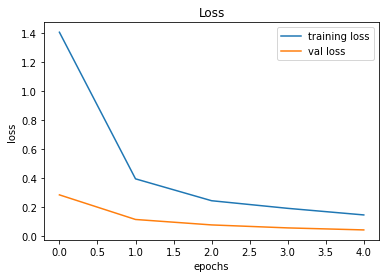

395/395 [==============================] - 2s 5ms/step
Confusion Matrix:
[[ 50   6   0 ...   0   0   0]
 [  0 713   2 ...   0   0   0]
 [  0  41 701 ...   0   0   0]
 ...
 [  0   1   0 ...  87   0   0]
 [  0   0   0 ...   0  49   0]
 [  0   0   0 ...   0   0  90]]
Accuracy: 0.954553
Precision: 0.951253
Recall: 0.934989
F1 score: 0.940273


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)
print(data.shape, labels.shape)

# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.h5')

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model
path = os.path.join(cur_path,data_folder)
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)

# Predicting on test set
pred = np.argmax(model.predict(X_test),axis=1)

# Performance evaluation
cm = confusion_matrix(labels, pred)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred, average='macro')
print('F1 score: %f' % f1)



(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                      

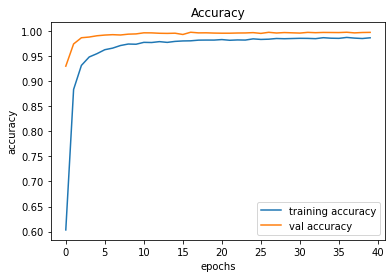

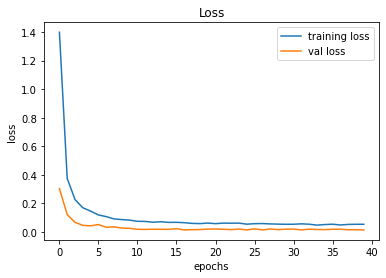

395/395 [==============================] - 2s 5ms/step
Confusion Matrix:
[[ 60   0   0 ...   0   0   0]
 [  0 713   0 ...   0   0   1]
 [  0   7 737 ...   0   0   0]
 ...
 [  0   1   0 ...  88   0   0]
 [  0   0   0 ...   0  56   0]
 [  0   0   0 ...   0   6  84]]
Accuracy: 0.974347
Precision: 0.965257
Recall: 0.959171
F1 score: 0.959640


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)
print(data.shape, labels.shape)

# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 40
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.h5')

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model
path = os.path.join(cur_path,data_folder)
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)

# Predicting on test set
pred = np.argmax(model.predict(X_test),axis=1)

# Performance evaluation
cm = confusion_matrix(labels, pred)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred, average='macro')
print('F1 score: %f' % f1)



(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                      

981/981 [==============================] - 13s 14ms/step - loss: 0.0484 - accuracy: 0.9874 - val_loss: 0.0140 - val_accuracy: 0.9976
Epoch 45/90
981/981 [==============================] - 13s 14ms/step - loss: 0.0506 - accuracy: 0.9871 - val_loss: 0.0227 - val_accuracy: 0.9941
Epoch 46/90
981/981 [==============================] - 14s 14ms/step - loss: 0.0477 - accuracy: 0.9874 - val_loss: 0.0177 - val_accuracy: 0.9967
Epoch 47/90
981/981 [==============================] - 13s 14ms/step - loss: 0.0553 - accuracy: 0.9856 - val_loss: 0.0195 - val_accuracy: 0.9972
Epoch 48/90
981/981 [==============================] - 13s 14ms/step - loss: 0.0524 - accuracy: 0.9872 - val_loss: 0.0159 - val_accuracy: 0.9967
Epoch 49/90
981/981 [==============================] - 13s 14ms/step - loss: 0.0460 - accuracy: 0.9887 - val_loss: 0.0243 - val_accuracy: 0.9959
Epoch 50/90
981/981 [==============================] - 13s 14ms/step - loss: 0.0470 - accuracy: 0.9886 - val_loss: 0.0216 - val_accuracy: 0.99

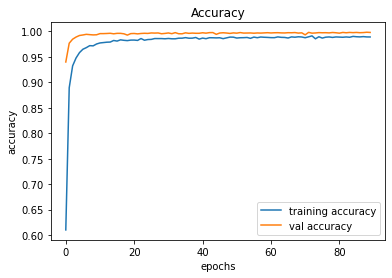

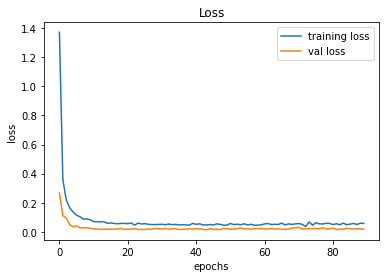

395/395 [==============================] - 3s 6ms/step
Confusion Matrix:
[[ 60   0   0 ...   0   0   0]
 [  0 708   4 ...   0   0   0]
 [  0   5 745 ...   0   0   0]
 ...
 [  0   0   0 ...  79   0   0]
 [  0   0   0 ...   0  55   0]
 [  0   0   0 ...   0   0  90]]
Accuracy: 0.971021
Precision: 0.961472
Recall: 0.948995
F1 score: 0.952291


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)
print(data.shape, labels.shape)

# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 90
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.h5')

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model
path = os.path.join(cur_path,data_folder)
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)

# Predicting on test set
pred = np.argmax(model.predict(X_test),axis=1)

# Performance evaluation
cm = confusion_matrix(labels, pred)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred, average='macro')
print('F1 score: %f' % f1)



(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                      

Epoch 44/150
981/981 [==============================] - 16s 16ms/step - loss: 0.0537 - accuracy: 0.9870 - val_loss: 0.0202 - val_accuracy: 0.9960
Epoch 45/150
981/981 [==============================] - 16s 16ms/step - loss: 0.0569 - accuracy: 0.9870 - val_loss: 0.0204 - val_accuracy: 0.9959
Epoch 46/150
981/981 [==============================] - 16s 16ms/step - loss: 0.0589 - accuracy: 0.9859 - val_loss: 0.0236 - val_accuracy: 0.9955
Epoch 47/150
981/981 [==============================] - 16s 16ms/step - loss: 0.0597 - accuracy: 0.9863 - val_loss: 0.0203 - val_accuracy: 0.9958
Epoch 48/150
981/981 [==============================] - 16s 16ms/step - loss: 0.0493 - accuracy: 0.9882 - val_loss: 0.0174 - val_accuracy: 0.9962
Epoch 49/150
981/981 [==============================] - 17s 17ms/step - loss: 0.0586 - accuracy: 0.9867 - val_loss: 0.0174 - val_accuracy: 0.9964
Epoch 50/150
981/981 [==============================] - 17s 18ms/step - loss: 0.0509 - accuracy: 0.9879 - val_loss: 0.0225 -

981/981 [==============================] - 29s 30ms/step - loss: 0.0645 - accuracy: 0.9890 - val_loss: 0.0275 - val_accuracy: 0.9974
Epoch 101/150
981/981 [==============================] - 29s 30ms/step - loss: 0.0508 - accuracy: 0.9892 - val_loss: 0.0256 - val_accuracy: 0.9976
Epoch 102/150
981/981 [==============================] - 29s 29ms/step - loss: 0.0526 - accuracy: 0.9897 - val_loss: 0.0193 - val_accuracy: 0.9973
Epoch 103/150
981/981 [==============================] - 29s 29ms/step - loss: 0.0613 - accuracy: 0.9885 - val_loss: 0.0200 - val_accuracy: 0.9976
Epoch 104/150
981/981 [==============================] - 28s 28ms/step - loss: 0.0658 - accuracy: 0.9876 - val_loss: 0.0225 - val_accuracy: 0.9972
Epoch 105/150
981/981 [==============================] - 28s 28ms/step - loss: 0.0543 - accuracy: 0.9896 - val_loss: 0.0217 - val_accuracy: 0.9971
Epoch 106/150
981/981 [==============================] - 28s 28ms/step - loss: 0.0631 - accuracy: 0.9890 - val_loss: 0.0316 - val_ac

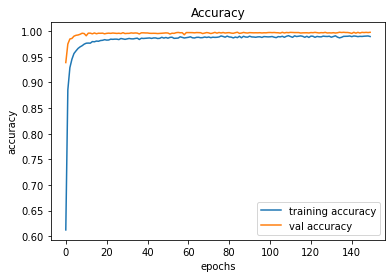

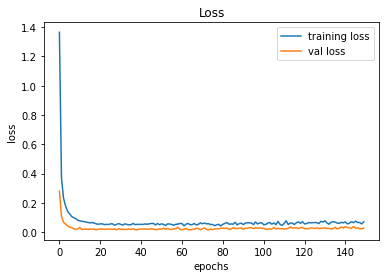

395/395 [==============================] - 4s 9ms/step
Confusion Matrix:
[[ 60   0   0 ...   0   0   0]
 [  0 719   1 ...   0   0   0]
 [  0   4 743 ...   0   0   0]
 ...
 [  0   1   0 ...  85   0   0]
 [  0   0   0 ...   0  54   0]
 [  0   0   0 ...   0   1  89]]
Accuracy: 0.974109
Precision: 0.965918
Recall: 0.960331
F1 score: 0.961533


In [5]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)
print(data.shape, labels.shape)

# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 150
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.h5')

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model
path = os.path.join(cur_path,data_folder)
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)

# Predicting on test set
pred = np.argmax(model.predict(X_test),axis=1)

# Performance evaluation
cm = confusion_matrix(labels, pred)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred, average='macro')
print('F1 score: %f' % f1)

